In [5]:
import h5py    
import numpy as np
import matplotlib.pyplot as plt 

train_data = h5py.File("fracture_train_data.h5", 'r')

print(train_data)
print(train_data.keys())



<HDF5 file "fracture_train_data.h5" (mode r)>
<KeysViewHDF5 ['data_index', 'density_train0', 'train_images0', 'train_images1', 'train_labels0']>


In [6]:
dataindex = np.array(train_data["data_index"])

density = np.array(train_data["density_train0"])

images0 = np.array(train_data["train_images0"])

images1 = np.array(train_data["train_images1"])

labels0 = np.array(train_data["train_labels0"])

In [7]:
im0 = np.reshape(images0, (11136,125,300,1))
im0 = im0.astype('float32') / 255

im1 = np.reshape(images1, (11136,125,300,1))
im1 = im1.astype('float32') / 255


In [8]:
print(im0.shape, type(im0))
print(im1.shape, type(im1))


(11136, 125, 300, 1) <class 'numpy.ndarray'>
(11136, 125, 300, 1) <class 'numpy.ndarray'>


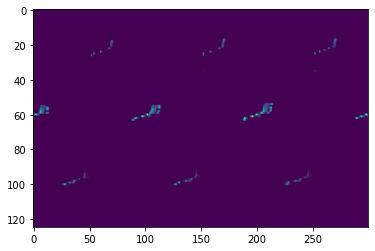

In [9]:
plt.imshow(im0[2780], aspect='auto')

In [10]:
print(labels0[2780])
print(type(labels0))

0.003827751196172249
<class 'numpy.ndarray'>


In [17]:
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import math
import scipy
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(im0, density, test_size = 0.20, random_state = 33)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
#Y_train = y_train.reshape((1, y_train.shape[0]))
#Y_test = y_test.reshape((1, y_test.shape[0]))

In [18]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
print(Y_train.shape)
print(X_train.shape)

(8908, 2)
(8908, 125, 300, 1)


In [20]:
#Reshape Data

Y_train = Y_train.T
Y_test = Y_test.T

print(Y_train.shape)
print(Y_train.T.shape)

(2, 8908)
(8908, 2)


In [21]:
unique_labels = np.unique(Y_train.T)
print(unique_labels)
new_y = []

for i in Y_train.T:
	new_y.append(np.flatnonzero(i == unique_labels)[0])
print(Y_train.T[0:10],new_y[0:10])
new_y = np.array(new_y)

[0. 1.]


IndexError: index 0 is out of bounds for axis 0 with size 0

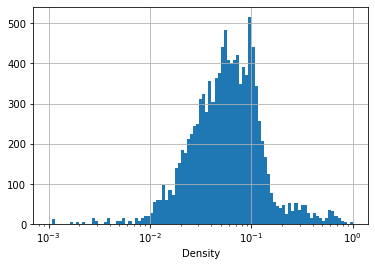

In [22]:
x = np.linspace(-3,0,100)

plt.hist(density, bins=10**x)
plt.xlabel('Density')
plt.xscale("log")
plt.grid("True")


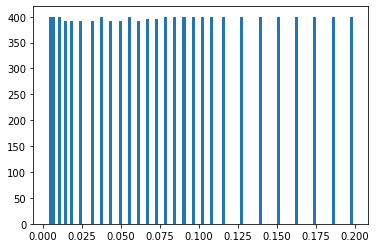

In [23]:
plt.hist(labels0, bins=100);

In [24]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import BatchNormalization

In [28]:

model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', input_shape = (125,300,1),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 125, 300, 32)      320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 300, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 150, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 150, 64)       18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 150, 64)       256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 75, 128)      

In [29]:
opt = keras.optimizers.Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=model.fit(X_train, Y_train.T, epochs=5, validation_split=.1)

Train on 8017 samples, validate on 891 samples
Epoch 1/5
8017/8017 [==============================] - 453s 57ms/sample - loss: 0.1806 - accuracy: 0.9929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
 288/8017 [>.............................] - ETA: 8:42 - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: 

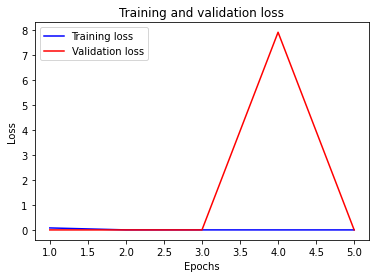

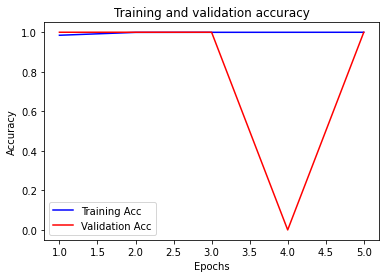

In [ ]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test.T)
print(test_accuracy)

2228/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
Y_pred = (model.predict(im1))
print(Y_pred[0])



[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.9085571e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.9692194e-22 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
